In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [2]:
orders = [17,11,10,13,9,1,8,18,15,5,4,6,14,12,2,3,7,16]
flist = glob.glob("quantification/*.csv")
df = pd.DataFrame()
for file, order, in zip(flist, orders):
    file_tmp = pd.read_csv(file,index_col=0)
    file_tmp["sample"] = file[15:-4]
    file_tmp["order"] = order
    df = pd.concat([df,file_tmp])
df = df.reset_index(drop = True)
df2 = df.sort_values('order')
df2

Mean         sample  order
294    34.696   SK276-DMSO-1      1
273    45.957   SK276-DMSO-1      1
274    66.029   SK276-DMSO-1      1
275    50.145   SK276-DMSO-1      1
276    41.797   SK276-DMSO-1      1
..        ...            ...    ...
371  2714.188  SK284-625uM-1     18
372  2559.957  SK284-625uM-1     18
373  3905.899  SK284-625uM-1     18
363  2612.058  SK284-625uM-1     18
399  2117.739  SK284-625uM-1     18

[900 rows x 3 columns]

In [3]:
concs = [0,0.008,0.04,0.2,1,5,25,125,625]
adds = ['control', 'HO1']

strain =[]
concentration = []
for add in adds:
    for conc in concs:
        strain = np.hstack([strain, np.full(50, (add))])
        concentration = np.hstack([concentration, np.full(50, (conc))])
df2['strain'] = strain 
df2['concentration (uM)'] = concentration
df2

Mean         sample  order   strain  concentration (uM)
294    34.696   SK276-DMSO-1      1  control                 0.0
273    45.957   SK276-DMSO-1      1  control                 0.0
274    66.029   SK276-DMSO-1      1  control                 0.0
275    50.145   SK276-DMSO-1      1  control                 0.0
276    41.797   SK276-DMSO-1      1  control                 0.0
..        ...            ...    ...      ...                 ...
371  2714.188  SK284-625uM-1     18      HO1               625.0
372  2559.957  SK284-625uM-1     18      HO1               625.0
373  3905.899  SK284-625uM-1     18      HO1               625.0
363  2612.058  SK284-625uM-1     18      HO1               625.0
399  2117.739  SK284-625uM-1     18      HO1               625.0

[900 rows x 5 columns]

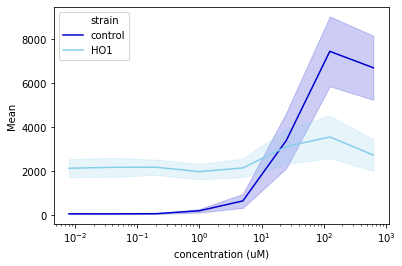

In [4]:
sns.lineplot(data=df2[df2["concentration (uM)"]!=0], x='concentration (uM)', y='Mean', hue='strain', ci='sd',palette=['mediumblue','skyblue'])
plt.xscale('log')
#plt.savefig("HO1-PCB-3.pdf")